In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import dask.dataframe as dataframe

In [52]:
groot = pd.read_csv(r"./GRooTFullVersion.csv", encoding="latin", low_memory=False)
groot.head()

,GRooTID,source,versionSource,originalID,referencesAbbreviated,references,referencesDataset,referencesAdditional,family,genus,...,belowgroundEntitiesOrder,belowgroundEntitiesOrderMin,belowgroundEntitiesOrderMax,belowgroundEntitiesFunctional,belowgroundEntitiesDiameterMin,belowgroundEntitiesDiameterMax,traitName,traitValue,errorRiskEntries,errorRisk
0,1,FRED,2.0,33116.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Betula,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.85,NaN,NaN
1,2,FRED,2.0,33115.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Picea,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.90,NaN,NaN
2,3,FRED,2.0,33113.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Pinus,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,1.00,NaN,NaN
3,4,FRED,2.0,33112.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Pinus,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.98,NaN,NaN
4,5,FRED,2.0,33114.0,Aaltonen 1920,Aaltonen VT. 1920. Abreiten Der Forstwissensch...,"Fan Y, Miguez-Macho G, Jobbagy EG, Jackson RB,...",NaN,NaN,Pinus,...,NaN,NaN,NaN,NaN,NaN,NaN,Rooting_depth,0.56,NaN,NaN


In [53]:
groot.shape

(114222, 73)

In [54]:
groot.loc[:, "traitName"].unique()

array(['Rooting_depth', 'Root_production', 'Root_turnover_rate',
       'Root_C_concentration', 'Root_C_N_ratio',
       'Root_lignin_concentration', 'Root_N_concentration',
       'Root_total_structural_carbohydrate_concentration',
       'Root_Ca_concentration', 'Root_K_concentration',
       'Root_Mg_concentration', 'Root_P_concentration',
       'Root_length_density_volume', 'Specific_root_respiration',
       'Root_mass_density', 'Root_Mn_concentration',
       'Root_mycorrhizal colonization', 'Root_mass_fraction',
       'Root_litter_mass_loss_rate', 'Coarse_root_fine_root_mass_ratio',
       'Fine_root_mass_leaf_mass_ratio', 'Mean_Root_diameter',
       'Root_tissue_density', 'Specific_root_area',
       'Specific_root_length', 'Root_stele_diameter',
       'Root_stele_fraction', 'Root_branching_density',
       'Root_lifespan_mean', 'Root_lifespan_median',
       'Root_vessel_diameter', 'Root_branching_ratio',
       'Root_dry_matter_content', 'Root_cortex_thickness',
       'N

In [55]:
np.unique(groot.loc[:, "traitName"], return_counts=True)

(array(['Coarse_root_fine_root_mass_ratio',
        'Fine_root_mass_leaf_mass_ratio', 'Lateral_spread',
        'Mean_Root_diameter', 'Net_nitrogen_uptake_rate', 'Root_C_N_ratio',
        'Root_C_concentration', 'Root_Ca_concentration',
        'Root_K_concentration', 'Root_Mg_concentration',
        'Root_Mn_concentration', 'Root_N_P_ratio', 'Root_N_concentration',
        'Root_P_concentration', 'Root_branching_density',
        'Root_branching_ratio', 'Root_cortex_thickness',
        'Root_dry_matter_content', 'Root_length_density_volume',
        'Root_lifespan_mean', 'Root_lifespan_median',
        'Root_lignin_concentration', 'Root_litter_mass_loss_rate',
        'Root_mass_density', 'Root_mass_fraction',
        'Root_mycorrhizal colonization', 'Root_production',
        'Root_stele_diameter', 'Root_stele_fraction',
        'Root_tissue_density',
        'Root_total_structural_carbohydrate_concentration',
        'Root_turnover_rate', 'Root_vessel_diameter',
        'Root_xylem_

In [56]:
groot.loc[:, "family"].isna().mean() # fucking hell!!!

np.float64(0.7910822783701914)

In [57]:
rdepth = groot.loc[groot.loc[:, "traitName"] == "Rooting_depth", ["genus", "traitValue"]]

In [58]:
rdepth.shape

(2669, 2)

In [59]:
genus = np.unique(groot.genus)

In [60]:
genus.size # that's a lot!!!

1959

In [61]:
Counter(groot.genus) # Pinus has the most records

Counter({'Pinus': 6675,
         'Quercus': 4075,
         'Betula': 4069,
         'Acer': 3775,
         'Poa': 1966,
         'Festuca': 1957,
         'Carex': 1636,
         'Fraxinus': 1589,
         'Picea': 1485,
         'Plantago': 1440,
         'Galium': 1436,
         'Trifolium': 1398,
         'Anthoxanthum': 1312,
         'Larix': 1287,
         'Ranunculus': 1283,
         'Populus': 1259,
         'Dactylis': 1238,
         'Veronica': 1148,
         'Rumex': 1118,
         'Fagus': 1113,
         'Glycine': 926,
         'Achillea': 925,
         'Lolium': 915,
         'Eleocharis': 896,
         'Alopecurus': 888,
         'Centaurea': 882,
         'Agrostis': 847,
         'Arrhenatherum': 844,
         'Cynosurus': 742,
         'Bromus': 734,
         'Eucalyptus': 641,
         'Juncus': 623,
         'Helictotrichon': 623,
         'Abies': 578,
         'Medicago': 543,
         'Pilosella': 539,
         'Helianthus': 529,
         'Phleum': 529,
         

In [62]:
pinus = groot.loc[np.bitwise_and(groot.genus == "Pinus", groot.traitName == "Rooting_depth"), "traitValue"]

In [63]:
pinus

2        1.0000
3        0.9800
4        0.5600
290      2.2000
291      2.0000
          ...  
60095    0.8128
60096    0.0762
60097    0.9779
61501    1.2500
61510    1.0000
Name: traitValue, Length: 140, dtype: float64

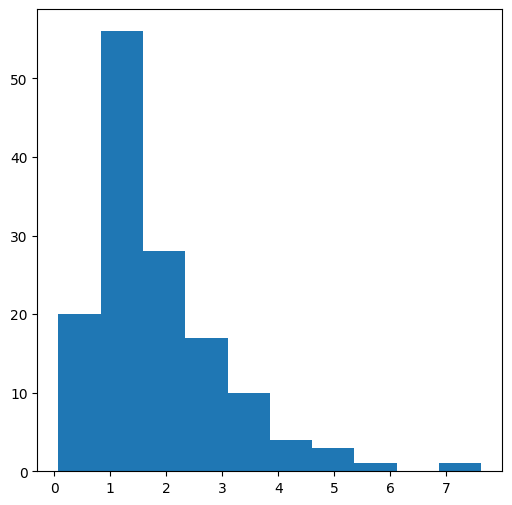

In [65]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.hist(pinus)
plt.show()

In [ ]:
dataframe.read_csv(r"./GRooTFullVersion.csv", encoding="latin")

In [66]:
dataframe.

<module 'dask.dataframe' from 'C:\\Program Files\\Python313\\Lib\\site-packages\\dask\\dataframe\\__init__.py'>